<a href="https://colab.research.google.com/github/sharmadharmpal/datascience/blob/main/Eda_2_AirBnB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project name: AirBNB data for NY state data for 2019 

What to find
1. which hosts are busiest and why
2. What areas have more traffic than others and why is that the case
3. Are there any relatioships between prices, number of reviews and the number of days that a given listing is booked

In [ ]:
#github

# Basic imports, Loading data and configuration

In [ ]:
# Import basic libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
# Load data file
df=pd.read_csv("https://raw.githubusercontent.com/sharmadharmpal/PTestData/main/AirBnb_NY_2019.csv")

In [ ]:
#setting figure size for future visualizations
sns.set(rc={'figure.figsize':(30,10)})
sns.set_style('white')

In [ ]:
# EDA

In [ ]:
df.shape

(48895, 16)

In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
df.sample(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
38122,30091241,Tribeca - Large 4 bedroom 2 bathroom for Xmas/NY,102655617,Mahesh,Manhattan,Tribeca,40.71546,-74.00856,Entire home/apt,2000,1,1,2019-01-01,0.16,1,0
17051,13532366,Chill Private Room in Extremely Convenient Place,9540269,Josh,Manhattan,Upper West Side,40.76986,-73.98673,Private room,90,1,1,2016-08-09,0.03,1,0


In [ ]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
#Drop unnecessary columns
ColsToDrop=['id','name','host_name','last_review','latitude','longitude']
df.drop(ColsToDrop,axis=1, inplace=True)

In [ ]:
df.fillna({'reviews_per_month':0},inplace=True)
#another way could be reviews per month, but we will do it later
#df['reviews_per_month'] = df.groupby('host_id').transform(lambda x: x.fillna(x.mean()))

In [ ]:
df.describe().apply(lambda s:s.apply(lambda x:format(x,'f')))

,host_id,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,67620010.646610,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,78610967.032667,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2438.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7822033.000000,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,30793816.000000,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,107434423.000000,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,274321313.000000,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


# 1st question
 which hosts are busiest and why

 WHY part is not clear

In [ ]:
# find top most host_id
#df['column'].nlargest(n=5)
top_host=df.host_id.value_counts().nlargest(n=10)
top_host_df=pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'host_id','host_id':'Busy_Count'},inplace=True)
#top_host_df.Busy_Count.sort_values(ascending=False)


[Text(0, 0, '7503643'),
 Text(0, 0, '12243051'),
 Text(0, 0, '16098958'),
 Text(0, 0, '22541573'),
 Text(0, 0, '30283594'),
 Text(0, 0, '61391963'),
 Text(0, 0, '107434423'),
 Text(0, 0, '137358866'),
 Text(0, 0, '200380610'),
 Text(0, 0, '219517861')]

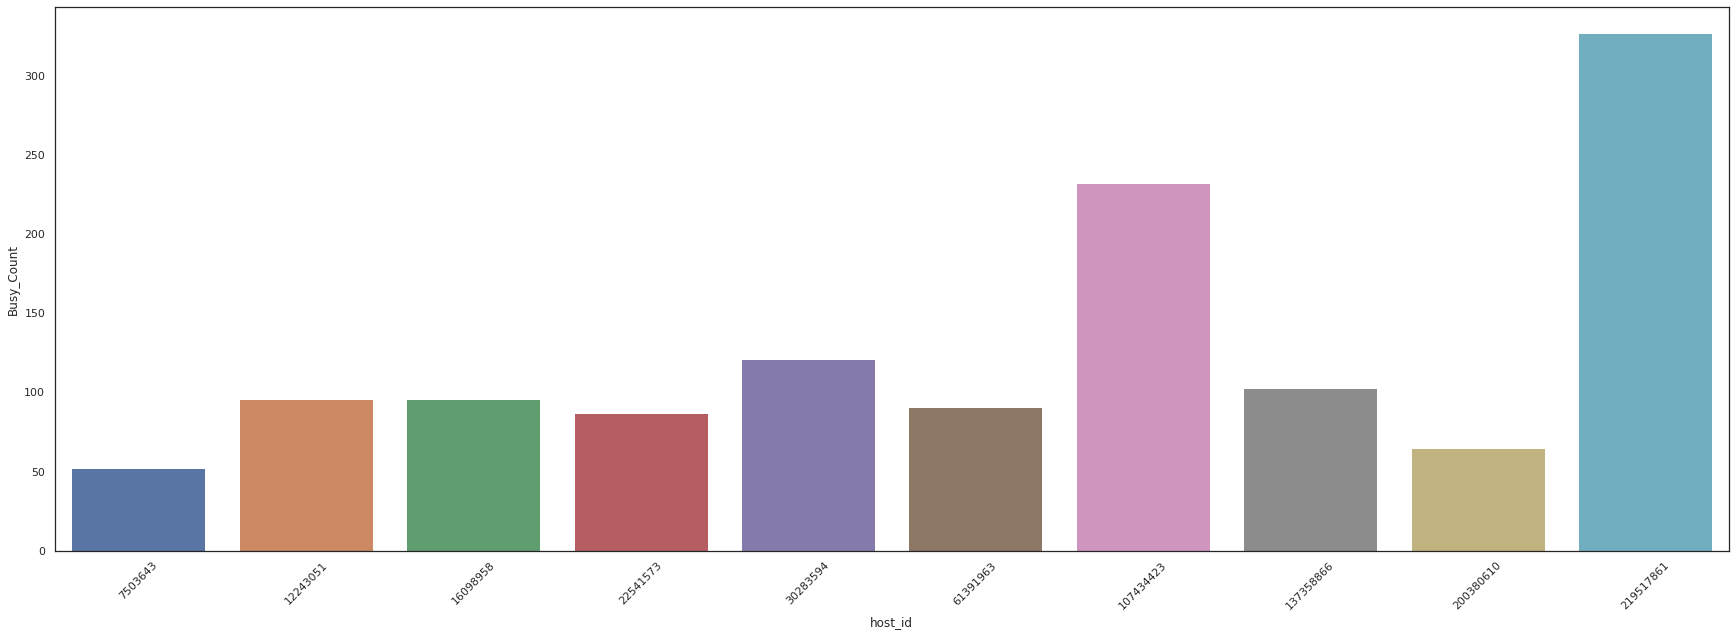

In [ ]:
tophost_plt=sns.barplot(x='host_id',y='Busy_Count',data=top_host_df)
tophost_plt.set_xticklabels(tophost_plt.get_xticklabels(),rotation=45)

SyntaxError: ignored

In [ ]:
df

,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,Private room,150,3,0,0.00,1,365
3,4869,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...
48890,8232441,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,0.00,2,9
48891,6570630,Brooklyn,Bushwick,Private room,40,4,0,0.00,2,36
48892,23492952,Manhattan,Harlem,Entire home/apt,115,10,0,0.00,1,27
48893,30985759,Manhattan,Hell's Kitchen,Shared room,55,1,0,0.00,6,2


# Question 2
What areas have more traffic than others and why is that the case

WHY part is not clear to me

In [ ]:
# find top most host_id
cnt_AreaTraffic=df.neighbourhood.value_counts().nlargest(n=10)
df_AreaTraffic=pd.DataFrame(cnt_AreaTraffic)
df_AreaTraffic.reset_index(inplace=True)
df_AreaTraffic.rename(columns={'index':'Area','neighbourhood':'Listing_Count'},inplace=True)
df_AreaTraffic


,Area,Listing_Count
0,Williamsburg,3920
1,Bedford-Stuyvesant,3714
2,Harlem,2658
3,Bushwick,2465
4,Upper West Side,1971
5,Hell's Kitchen,1958
6,East Village,1853
7,Upper East Side,1798
8,Crown Heights,1564
9,Midtown,1545


[Text(0, 0, 'Williamsburg'),
 Text(0, 0, 'Bedford-Stuyvesant'),
 Text(0, 0, 'Harlem'),
 Text(0, 0, 'Bushwick'),
 Text(0, 0, 'Upper West Side'),
 Text(0, 0, "Hell's Kitchen"),
 Text(0, 0, 'East Village'),
 Text(0, 0, 'Upper East Side'),
 Text(0, 0, 'Crown Heights'),
 Text(0, 0, 'Midtown')]

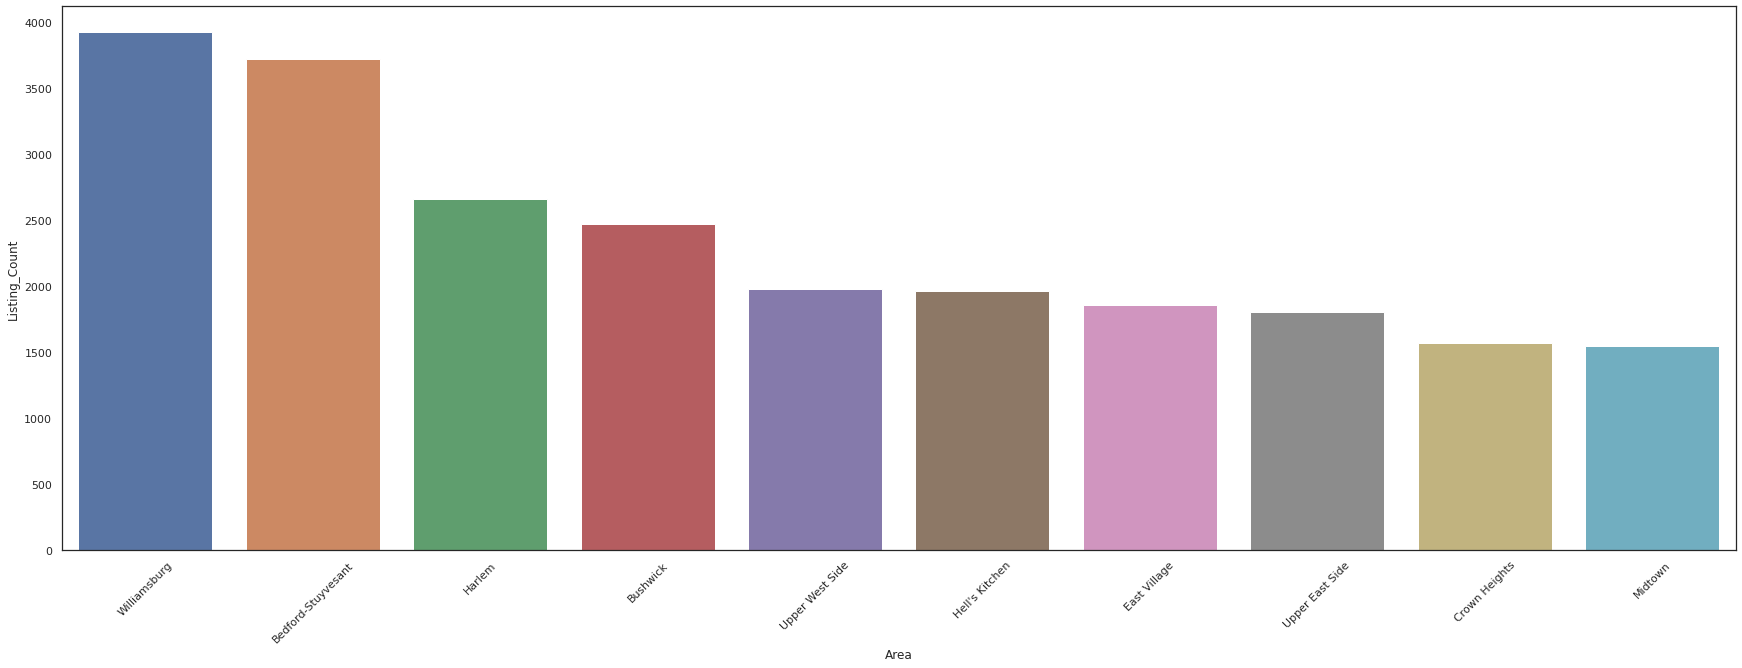

In [ ]:
AreaTraffic_plt=sns.barplot(x='Area',y='Listing_Count',data=df_AreaTraffic)
AreaTraffic_plt.set_xticklabels(AreaTraffic_plt.get_xticklabels(),rotation=45)

# Question 3:
Are there any relatioships between prices, number of reviews and the number of days that a given listing is booked

Best way to fill in the null values with mean or any other function
fillna+ groupby+ transform + function 

In [ ]:
#df['reviews_per_month'] = df['reviews_per_month'].fillna(df.groupby('host_id')['reviews_per_month'].transform('mean'))

In [ ]:
#df.groupby('host_id').mean()

In [ ]:
corr=df.corr()

In [ ]:
corr

,host_id,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
host_id,1.000000,0.015309,-0.017364,-0.140106,0.209783,0.154950,0.203492
price,0.015309,1.000000,0.042799,-0.047954,-0.050564,0.057472,0.081829
minimum_nights,-0.017364,0.042799,1.000000,-0.080116,-0.124905,0.127960,0.144303
number_of_reviews,-0.140106,-0.047954,-0.080116,1.000000,0.589407,-0.072376,0.172028
reviews_per_month,0.209783,-0.050564,-0.124905,0.589407,1.000000,-0.047312,0.163732
calculated_host_listings_count,0.154950,0.057472,0.127960,-0.072376,-0.047312,1.000000,0.225701
availability_365,0.203492,0.081829,0.144303,0.172028,0.163732,0.225701,1.000000


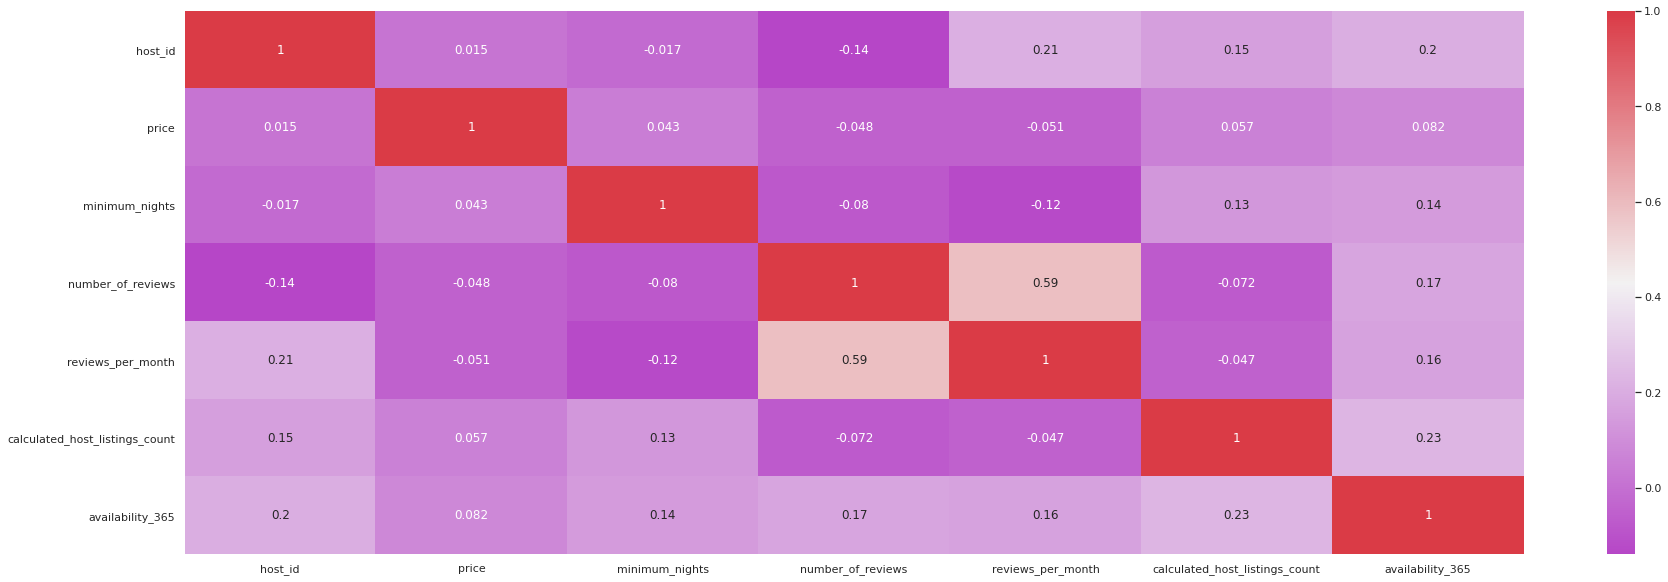

In [ ]:
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot=True,cmap = sns.diverging_palette(300,10,as_cmap=True))

In [ ]:
# Above heatmap shows good correlation between number_of_reviews and reviews_per_month

In [ ]:
#sns.pairplot(df)

# Ignore below this

# Ignore below code

In [ ]:
def printhist(colToPlot,color):
  xmin=min(df[colToPlot])
  xmax= max(df[colToPlot])
  width=xmax-xmin
  print(xmin, xmax, width)
  #print(df[colToPlot])
  bins=np.arange(xmin,xmax,width/20)
  print(bins)
  sns.histplot(df[colToPlot],color=color,kde=False,bins=bins)

In [ ]:
featureDicToPlot={'price':'red','minimum_nights':'green','number_of_reviews':'yellow','reviews_per_month':'blue'}#,'calculated_host_listings_count','availability_365']


price red
0 10000 10000
[   0.  500. 1000. 1500. 2000. 2500. 3000. 3500. 4000. 4500. 5000. 5500.
 6000. 6500. 7000. 7500. 8000. 8500. 9000. 9500.]
minimum_nights green
1 1250 1249
[1.00000e+00 6.34500e+01 1.25900e+02 1.88350e+02 2.50800e+02 3.13250e+02
 3.75700e+02 4.38150e+02 5.00600e+02 5.63050e+02 6.25500e+02 6.87950e+02
 7.50400e+02 8.12850e+02 8.75300e+02 9.37750e+02 1.00020e+03 1.06265e+03
 1.12510e+03 1.18755e+03]
number_of_reviews yellow
0 629 629
[  0.    31.45  62.9   94.35 125.8  157.25 188.7  220.15 251.6  283.05
 314.5  345.95 377.4  408.85 440.3  471.75 503.2  534.65 566.1  597.55]
reviews_per_month blue
0.0 58.5 58.5
[ 0.     2.925  5.85   8.775 11.7   14.625 17.55  20.475 23.4   26.325
 29.25  32.175 35.1   38.025 40.95  43.875 46.8   49.725 52.65  55.575]


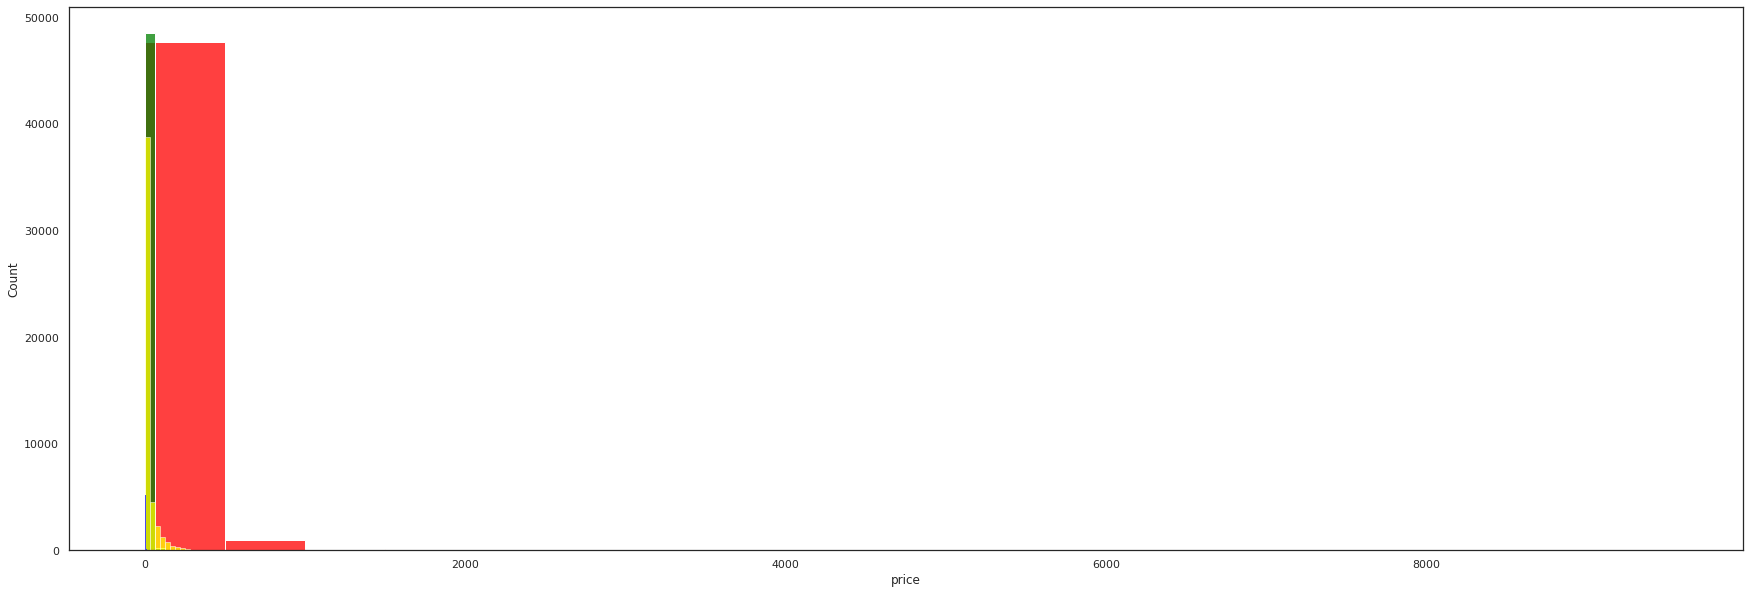

In [ ]:
for featureToPlot in featureDicToPlot:
  print(featureToPlot,featureDicToPlot[featureToPlot])
  printhist(featureToPlot,featureDicToPlot[featureToPlot])

In [ ]:
colsForPlot=['price','minimum_nights'] #,'number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']
colorToPlot=['red','green']

0 10000 10000
[   0.  500. 1000. 1500. 2000. 2500. 3000. 3500. 4000. 4500. 5000. 5500.
 6000. 6500. 7000. 7500. 8000. 8500. 9000. 9500.]


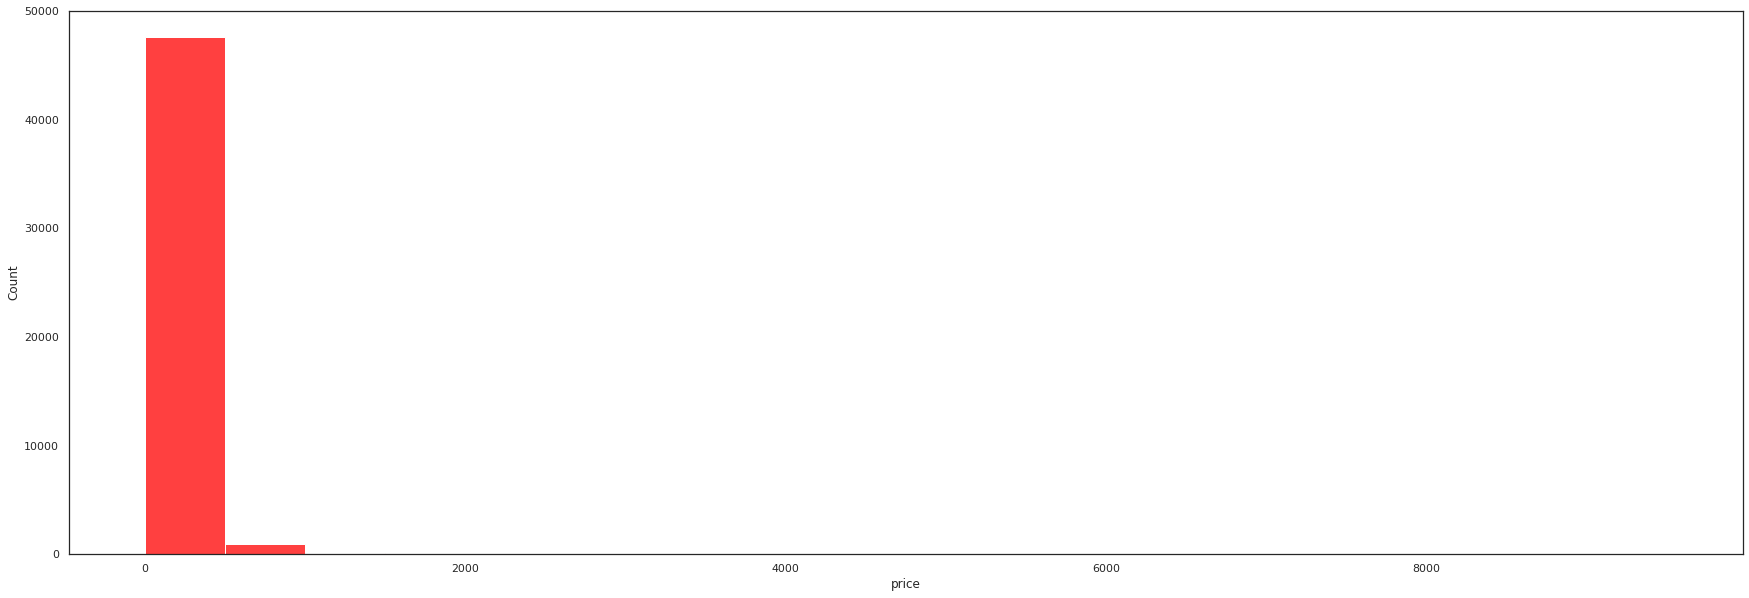

In [ ]:
 printhist('price','red')

1 1250 1249
[1.00000e+00 6.34500e+01 1.25900e+02 1.88350e+02 2.50800e+02 3.13250e+02
 3.75700e+02 4.38150e+02 5.00600e+02 5.63050e+02 6.25500e+02 6.87950e+02
 7.50400e+02 8.12850e+02 8.75300e+02 9.37750e+02 1.00020e+03 1.06265e+03
 1.12510e+03 1.18755e+03]


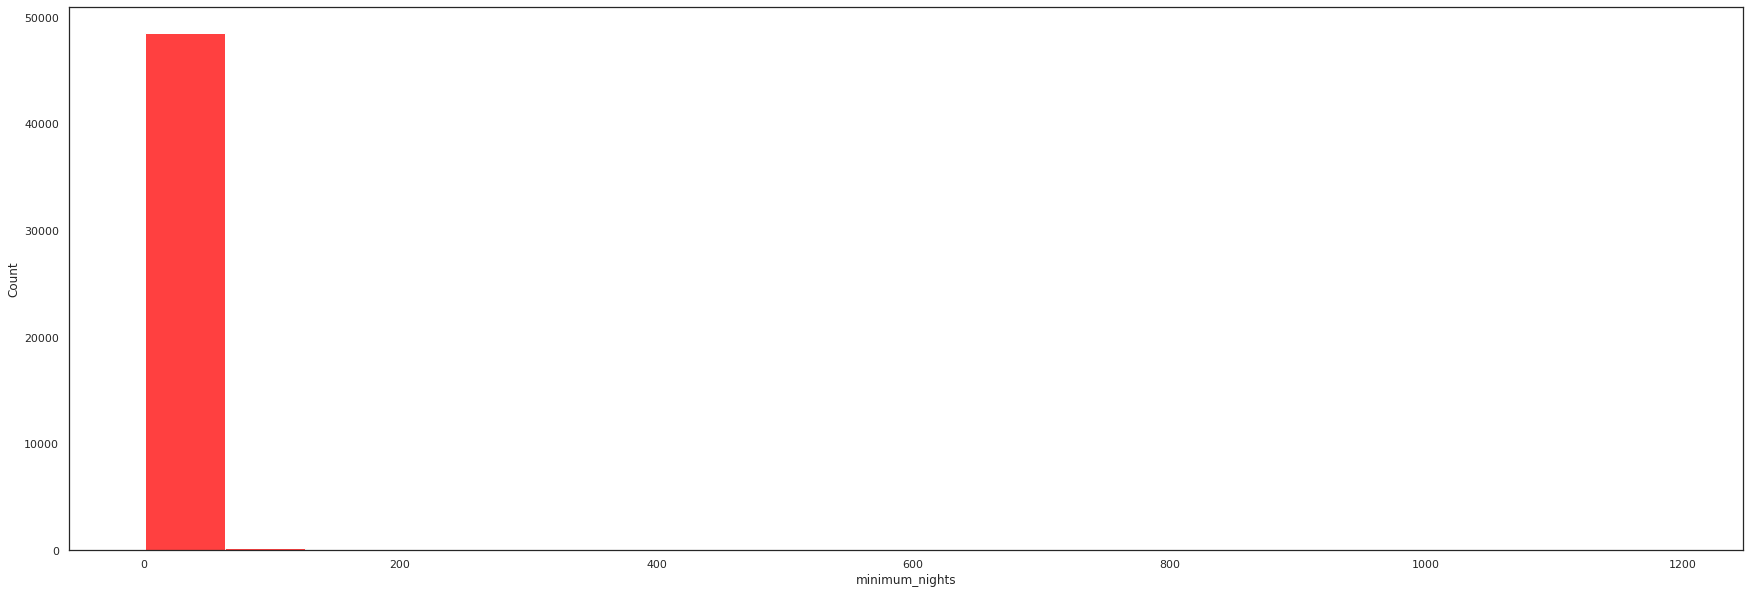

In [ ]:
 printhist('minimum_nights','red')

In [ ]:
for col,color in colsForPlot,colorToPlot:
  print(col,color)
  #printhist(col,'red')

price minimum_nights
red green
